# Lorenz system
The Lorenzs model has three state variables $(x_1,x_2,x_3)$. System corresponds to the equations from a mathematical model for atmospheric convection, where $x_1$, $x_2$, and $x_3$ denote variable proportional to convective intensity, horizontal, and vertical temperature differences. The system is:
$$ \dfrac{dx_1}{dt}=-\sigma x_1+\sigma x_2$$
$$ \dfrac{dx_2}{dt}=-x_1x_3+rx_1-x_2$$
$$ \dfrac{dx_3}{dt}=x_1x_2-bx_3$$.
The Lorenzs system with parameters $\sigma=10$, $r=126.52$ and $b=8/3$ generate chaotic behavior.

## Numerical solution of differential equation
$\sigma=10$

$r=126.52$

$b=8/3$

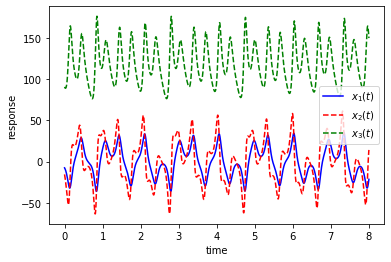

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

delta = 10
r = 126.52
b = 8/3

# function that returns dz/dt
def model(w,t):
    dxdt = -delta*w[0]+delta*w[1]
    dydt = -w[0]*w[2]+r*w[0]-w[1]
    dzdt = w[0]*w[1]-b*w[2]
    dwdt = [dxdt,dydt,dzdt]
    return dwdt

# initial condition
w0 = [-7.69,-15.61,90.39]

# time points
t = np.linspace(0,8,2000)

# solve ODE
w = odeint(model,w0,t)

# plot results
plt.plot(t,w[:,0],'b-',label=r'$x_1(t)$')
plt.plot(t,w[:,1],'r--',label=r'$x_2(t)$')
plt.plot(t,w[:,2],'g--',label=r'$x_3(t)$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(w[:,0],w[:,2],'b-',label=r'$x_1,x_3$')
plt.ylabel('$x_2(t)$')
plt.xlabel('$x_1(t)$')
plt.legend(loc='best')
plt.show()

In [ ]:
ax = plt.axes(projection = '3d')
ax.plot(w[:,0],w[:,1],w[:,2])
plt.show()

In [3]:
import numpy as np
from autode.evaluation import *
from autode.datagenerators import *
from autode.optimizers import *

# Run Evaluation

## Define $t$ and Generate Observations

In [4]:
gen2 = LorenzDataGenerator()
t2 = np.linspace(0,8,2000)
obs2 = gen2.generate_orig(t2)
obs2

array([[ -7.69      , -15.61      ,  90.39      ],
       [ -8.02180094, -16.68828548,  89.93536101],
       [ -8.38405905, -17.82651887,  89.54403637],
       ...,
       [-24.40795884,   9.34444188, 154.96061564],
       [-23.03247349,  11.87876065, 152.3112799 ],
       [-21.61954761,  14.00971508, 149.54190726]])

In [ ]:
w

In [ ]:
# plot results
plt.plot(t2,obs2[:,0],'b-',label=r'$x_1(t)$')
plt.plot(t2,obs2[:,1],'r--',label=r'$x_2(t)$')
plt.plot(t2,obs2[:,2],'g--',label=r'$x_3(t)$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Create Evaluator Aware of the Data

In [5]:
evaluator2 = ODEINTEvaluator(t2, obs2)

## Evaluate Models

### Correct Model

In [ ]:
print("Final Error:", evaluator2.evaluate([lambda x1, x2, t, a, b: a*x1 + b*x2, lambda x1, x2, x3, t, c, d, e: c*x1*x3 + d*x1 + e*x2, lambda x1, x2, x3, t, f, g: f*x1*x2 + g*x3],attempts_per_exponent=1000))

## Results

In [ ]:
%%time
evaluator2.params_for_last_model

In [ ]:
print("Final Error:", evaluator2.evaluate([lambda x1, x2, t, a: a*x1 + 10*x2, lambda x1, x2, x3, t, d: -x1*x3 + d*x1 - x2, lambda x1, x2, x3, t, g: x1*x2 + g*x3],attempts_per_exponent=100))

In [ ]:
%%time
evaluator2.params_for_last_model

In [ ]:
print("Final Error:", evaluator2.evaluate([lambda x1, x2, x3, t, a: -a*x1 + a*x2, lambda x1, x2, x3, t, b: -x1*x3 + b*x1 - x2, lambda x1, x2, x3, t, c: x1*x2 + c*x3],attempts_per_exponent=200))